# BCI3333 Final Assessment

## Home Loan Approval Classification

### ATHIRAH NAJIHAH BINTI ZULKIFILI (CB20116)

loan_sanction_train.csv (https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_train.csv)

SVM & Random Forest Classification

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and generate descriptive analysis
ds = pd.read_csv('loan_sanction_train.csv')
print(ds.head(), '\n\n')
print(ds.shape, '\n\n')
print(ds.info(), '\n\n')

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [21]:
# Drop unwanted columns of data
ds = ds.drop(columns=['Loan_ID', 'Gender', 'Education', 'Self_Employed'])
print(ds.head(), '\n\n')

  Married Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0      No          0             5849                0.0         NaN   
1     Yes          1             4583             1508.0       128.0   
2     Yes          0             3000                0.0        66.0   
3     Yes          0             2583             2358.0       120.0   
4      No          0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  
0             360.0             1.0         Urban           Y  
1             360.0             1.0         Rural           N  
2             360.0             1.0         Urban           Y  
3             360.0             1.0         Urban           Y  
4             360.0             1.0         Urban           Y   




In [22]:
# Identify missing values
print(ds.isnull().sum(), '\n\n')

Married               3
Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 




In [23]:
# Identify duplicate rows
print(ds.duplicated().sum(), '\n\n')

# Drop duplicate rows
ds.drop_duplicates(inplace=True)
print(ds.duplicated().sum(), '\n\n')

1 


0 




In [24]:
# Identify outliers
print(ds.describe(), '\n\n')

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       613.000000         613.000000  591.000000        599.000000   
mean       5405.205546        1619.892202  146.473773        341.969950   
std        6113.877312        2928.445733   85.646686         65.170672   
min         150.000000           0.000000    9.000000         12.000000   
25%        2876.000000           0.000000  100.000000        360.000000   
50%        3812.000000        1167.000000  128.000000        360.000000   
75%        5800.000000        2283.000000  168.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      563.000000  
mean         0.841918  
std          0.365142  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000   




In [25]:
# Drop rows with missing values - Married
ds.dropna(subset=['Married'], inplace=True)

# Impute with mode - Dependents
ds['Dependents'].fillna(ds['Dependents'].mode()[0], inplace=True)

# Impute with mean - LoanAmount
ds['LoanAmount'].fillna(ds['LoanAmount'].mean(), inplace=True)

# Impute with mode - Loan_Amount_Term
ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0], inplace=True)

# Impute with mode - Credit_History
ds['Credit_History'].fillna(ds['Credit_History'].mode()[0], inplace=True)

In [26]:
# Double check for missing values
print(ds.isnull().sum(), '\n\n')

Married              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 




In [27]:
# Convert '3+' to a numeric value
ds['Dependents'] = ds['Dependents'].replace('3+', 3)

print(ds['Dependents'])

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 610, dtype: object


In [28]:
# Convert categorical data to numerical data - Married
ds['Married'] = ds['Married'].map({'No': 0, 'Yes': 1})

# Convert categorical data to numerical data - Property_Area
ds['Property_Area'] = ds['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# Convert categorical data to numerical data - Loan_Status
ds['Loan_Status'] = ds['Loan_Status'].map({'N': 0, 'Y': 1})

print(ds.head(), '\n\n')

   Married Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0        0          0             5849                0.0  146.431239   
1        1          1             4583             1508.0  128.000000   
2        1          0             3000                0.0   66.000000   
3        1          0             2583             2358.0  120.000000   
4        0          0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
0             360.0             1.0              2            1  
1             360.0             1.0              0            0  
2             360.0             1.0              2            1  
3             360.0             1.0              2            1  
4             360.0             1.0              2            1   




                    Married  Dependents  ApplicantIncome  CoapplicantIncome  \
Married            1.000000    0.338937         0.051565           0.077472   
Dependents         0.338937    1.000000         0.118746           0.029144   
ApplicantIncome    0.051565    0.118746         1.000000          -0.116196   
CoapplicantIncome  0.077472    0.029144        -0.116196           1.000000   
LoanAmount         0.147587    0.163266         0.566014           0.188386   
Loan_Amount_Term  -0.103006   -0.103338        -0.044286          -0.059269   
Credit_History     0.008991   -0.038257        -0.018785           0.011905   
Property_Area      0.001453    0.002611        -0.008609           0.010501   
Loan_Status        0.091255    0.010824        -0.005586          -0.057159   

                   LoanAmount  Loan_Amount_Term  Credit_History  \
Married              0.147587         -0.103006        0.008991   
Dependents           0.163266         -0.103338       -0.038257   
Applican

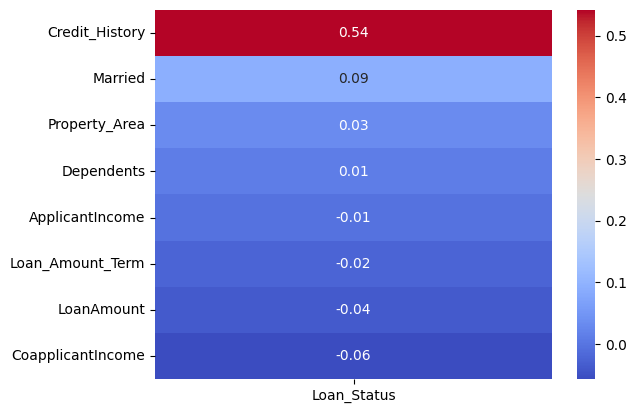

In [29]:
# Correlation matrix
print(ds.corr(), '\n\n')

# Data Visualization for correlation
import seaborn as sns

corr = ds.corr().sort_values(by='Loan_Status', ascending=False)
print(corr['Loan_Status'])
sns.heatmap(corr['Loan_Status'].drop('Loan_Status').to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [30]:
# Determine independent & dependent variable
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

print(x, '\n\n')
print(y, '\n\n')

[[0 '0' 5849 ... 360.0 1.0 2]
 [1 '1' 4583 ... 360.0 1.0 0]
 [1 '0' 3000 ... 360.0 1.0 2]
 ...
 [1 '1' 8072 ... 360.0 1.0 2]
 [1 '2' 7583 ... 360.0 1.0 2]
 [0 '0' 4583 ... 360.0 0.0 1]] 


[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 

In [31]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

print(x_train, '\n\n')
print(x_test, '\n\n')
print(y_train, '\n\n')
print(y_test, '\n\n')

[[1 3 5703 ... 360.0 1.0 0]
 [0 '0' 1916 ... 360.0 1.0 0]
 [1 '2' 3333 ... 360.0 1.0 1]
 ...
 [0 '0' 4350 ... 360.0 1.0 0]
 [1 '0' 3033 ... 360.0 1.0 2]
 [1 '0' 3941 ... 360.0 1.0 1]] 


[[0 '0' 7200 0.0 120.0 360.0 1.0 0]
 [0 '0' 3500 0.0 81.0 300.0 1.0 1]
 [0 '1' 7451 0.0 146.43123938879458 360.0 1.0 1]
 [1 '2' 1958 1456.0 60.0 300.0 1.0 2]
 [0 '0' 2717 0.0 60.0 180.0 1.0 2]
 [0 '0' 2833 1857.0 126.0 360.0 1.0 0]
 [0 '0' 2333 1451.0 102.0 480.0 0.0 2]
 [0 '0' 10000 1666.0 225.0 360.0 1.0 0]
 [1 '1' 2787 1917.0 146.0 360.0 0.0 0]
 [1 '1' 6000 0.0 160.0 360.0 1.0 0]
 [0 '0' 6400 0.0 200.0 360.0 1.0 0]
 [1 3 5703 0.0 128.0 360.0 1.0 2]
 [0 '0' 5815 3666.0 311.0 360.0 1.0 0]
 [1 '0' 2058 2134.0 88.0 360.0 1.0 2]
 [1 '0' 2917 536.0 66.0 360.0 1.0 0]
 [0 '2' 4923 0.0 166.0 360.0 0.0 1]
 [0 3 1830 0.0 146.43123938879458 360.0 0.0 2]
 [1 '0' 4310 0.0 130.0 360.0 1.0 1]
 [1 '1' 8072 240.0 253.0 360.0 1.0 2]
 [1 '0' 5568 2142.0 175.0 360.0 1.0 0]
 [1 3 4281 0.0 100.0 360.0 1.0 2]
 [1 '1' 1000 

In [32]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train, '\n\n')
print(x_test, '\n\n')

[[ 0.72128304  2.2044813   0.02617105 ...  0.29448799  0.42278122
  -1.31951718]
 [-1.38641829 -0.75368609 -0.54749929 ...  0.29448799  0.42278122
  -1.31951718]
 [ 0.72128304  1.2184255  -0.3328463  ...  0.29448799  0.42278122
  -0.04693935]
 ...
 [-1.38641829 -0.75368609 -0.17878695 ...  0.29448799  0.42278122
  -1.31951718]
 [ 0.72128304 -0.75368609 -0.37829153 ...  0.29448799  0.42278122
   1.22563849]
 [ 0.72128304 -0.75368609 -0.24074395 ...  0.29448799  0.42278122
  -0.04693935]] 


[[-1.38641829e+00 -7.53686090e-01  2.52942772e-01 -5.75703517e-01
  -3.18300218e-01  2.94487985e-01  4.22781222e-01 -1.31951718e+00]
 [-1.38641829e+00 -7.53686090e-01 -3.07548449e-01 -5.75703517e-01
  -7.70283731e-01 -6.07081254e-01  4.22781222e-01 -4.69393463e-02]
 [-1.38641829e+00  2.32369706e-01  2.90965284e-01 -5.75703517e-01
  -1.19801044e-02  2.94487985e-01  4.22781222e-01 -4.69393463e-02]
 [ 7.21283038e-01  1.21842550e+00 -5.41136952e-01 -5.93840621e-02
  -1.01365947e+00 -6.07081254e-01  4.227

In [33]:
# Fitting SVM classifier to training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel='linear', random_state=0)
classifierSVM.fit(x_train, y_train)

# Fitting RF classifier to training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifierRF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [34]:
# Predict test set results
y_predSVM = classifierSVM.predict(x_test)
y_predRF = classifierRF.predict(x_test)

print(y_predSVM, '\n\n')
print(y_predRF, '\n\n')

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1] 


[1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1] 




[[14 24]
 [ 1 83]] 




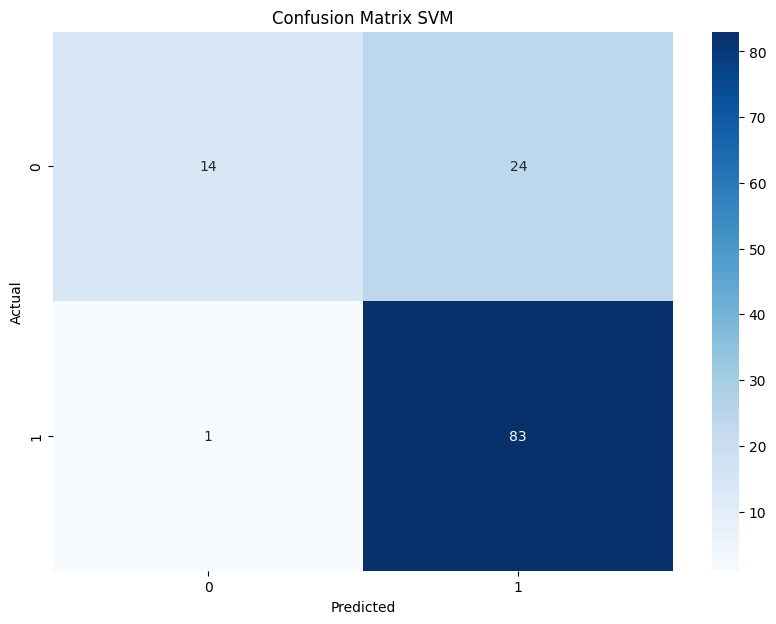

[[16 22]
 [ 3 81]] 




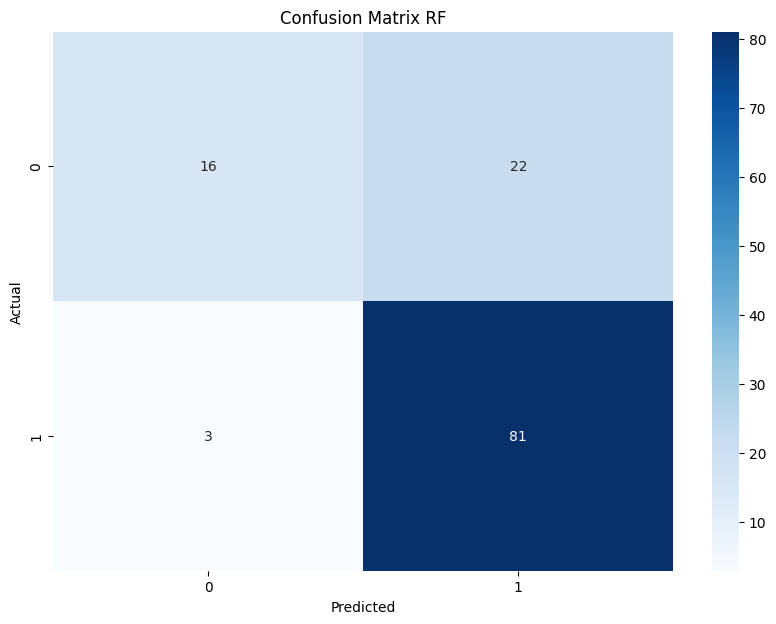

In [35]:
# Confusion matrix - SVM
from sklearn.metrics import confusion_matrix
cmSVM = confusion_matrix(y_test, y_predSVM)
print(cmSVM, '\n\n')

# Confusion matrix -SVM
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cmSVM, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

# Confusion matrix - RF
from sklearn.metrics import confusion_matrix
cmRF = confusion_matrix(y_test, y_predRF)
print(cmRF, '\n\n')

# Confusion matrix -RF
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cmRF, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [36]:
# Precision score, Recall score, F-score, Accuracy score - SVM
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics for SVM
svm_precision = precision_score(y_test, y_predSVM, average='weighted')
svm_recall = recall_score(y_test, y_predSVM, average='weighted')
svm_f1 = f1_score(y_test, y_predSVM, average='weighted')
svm_accuracy = accuracy_score(y_test, y_predSVM)

# Precision score, Recall score, F-score, Accuracy score - RF
rf_precision = precision_score(y_test, y_predRF, average='weighted')
rf_recall = recall_score(y_test, y_predRF, average='weighted')
rf_f1 = f1_score(y_test, y_predRF, average='weighted')
rf_accuracy = accuracy_score(y_test, y_predRF)

# Compare the metrics
print('Support Vector Machine Classifier')
print('Precision Score: ', svm_precision)
print('Recall Score: ', svm_recall)
print('F-Score: ', svm_f1)
print('Accuracy Score: ', svm_accuracy, '\n')

print('Random Forest Classifier')
print('Precision Score: ', rf_precision)
print('Recall Score: ', rf_recall)
print('F-Score: ', rf_f1)
print('Accuracy Score: ', rf_accuracy, '\n')

# Compare and determine the best model
if svm_accuracy > rf_accuracy:
    print('Support Vector Machine Classifier is the best model.')
elif rf_accuracy > svm_accuracy:
    print('Random Forest Classifier is the best model.')
else:
    print('Both models have the same accuracy. Further evaluation is needed.')

Support Vector Machine Classifier
Precision Score:  0.8247995505847505
Recall Score:  0.7950819672131147
F-Score:  0.7629566172148151
Accuracy Score:  0.7950819672131147 

Random Forest Classifier
Precision Score:  0.8037561674359383
Recall Score:  0.7950819672131147
F-Score:  0.7713392361415504
Accuracy Score:  0.7950819672131147 

Both models have the same accuracy. Further evaluation is needed.


In [37]:
# Perform cross-validation to evaluate and compare the performance of SVM & RF models
from sklearn.model_selection import cross_val_score

# Define models to evaluate
models = [
    ('Support Vector Machine', classifierSVM),
    ('Random Forest', classifierRF),
]

# Evaluate each model using cross-validation
results = []
for name, model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    results.append((name, scores.mean(), scores.std()))

# Print results
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accuracy = {mean_score:.4f}, Standard Deviation = {std_score:.4f}')

# Find the best model based on the mean accuracy
best_model = max(results, key=lambda x: x[1])
print('\nBest Model:', best_model[0])

Support Vector Machine: Mean Accuracy = 0.8135, Standard Deviation = 0.0122
Random Forest: Mean Accuracy = 0.7848, Standard Deviation = 0.0273

Best Model: Support Vector Machine


In [38]:
import pickle

pickle.dump(classifierSVM, open('loan_svm.pkl', 'wb'))